# solve_ODEs_CA3.py

Problem:
 
gas-phase reactions occur in a PFR: 

    Reaction1:   A -> B       -r1A = k1A*CA
    Reaction2:   2A -> C      -r2A = k2A*CA^2
 
Purpose & output:

    Figure 1 The relationship between temperature and system volume
    Figure 2 The relationship between A,B and C molar how rates and system volume

No input, the system parameters can be changed in ODEs_CA3.m.
 
The units and definitions of parameters:
    
    HRx1A = -20000 J/(mol of A reacted in reaction 1) 
    HRx2A = -60000 J/(mol of A reacted in reaction 2)
    CpA = 90 J/mol·°C
    CpB = 90 J/mol·°C
    CpC = 180 J/mol·°C
    Ua = 4000 J/m^3·s·°C
    Ta = 373 K (Constant) 

    At the beginning, Pure A is fed at a rate of 100 mol/s, a temperature of 150°C, and a concentration of 0.1 mol/dm^3
    FA = 100 mol/s
    FB = 0 mol/s
    FC = 0 mol/s
    T0 = 423 K
    CT0 = 0.1;
    
Equations:
$$\frac{dF_A}{dV}\, = \,r_A$$

$$\frac{dF_B}{dV}\, = \,r_B$$

$$\frac{dF_C}{dV}\, = \,r_C$$

$$\frac{dT}{dV}\, = \,\frac{U_a(T_a-T)+(-r_1A)(-\Delta H_{Rx1A})+(-r_2A)(-\Delta H_{Rx2A})}{F_A C_{P_A} + F_B C_{P_B} + F_C C_{P_C}}$$

Author:
     
     Rui Cai

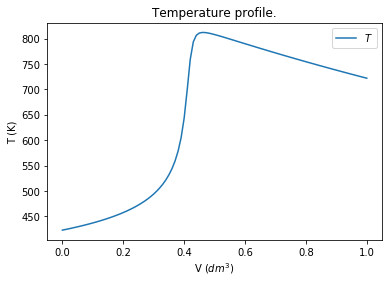

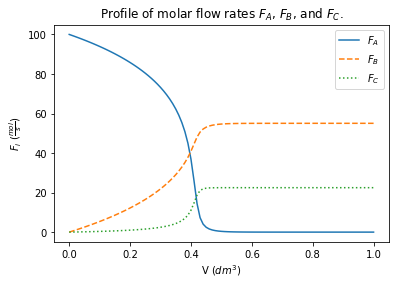

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Function defines the ODEs and takes initial variable values
def ODEs_CA3(F_and_T, V):
    # Defining variables from F_and_T input
    FA = F_and_T[0]
    FB = F_and_T[1]
    FC = F_and_T[2]
    T = F_and_T[3]
  
    # Defining other parameters
    
    FT = FA+FB+FC
    
    T0 = 423
    CT0 = 0.1
    CA = CT0*(FA/FT)*(T0/T)
    CB = CT0*(FB/FT)*(T0/T)
    CC = CT0*(FC/FT)*(T0/T)

    HRx1A = -20000
    HRx2A = -60000
    CpA = 90
    CpB = 90
    CpC = 180
    Ua = 4000
    Ta = 373

    E1overR = 4000
    k1A = 10*np.exp(E1overR*(1/300-1/T))
    E2overR = 9000
    k2A = 0.09*np.exp(E2overR*(1/300-1/T)) 
    
    r1A = -k1A*CA
    r2A = -k2A*CA**2
    rB = k1A*CA
    rC = 0.5*k2A*CA**2
    
    # define the derivatives
    dFA_dV = r1A+r2A
    dFB_dV = rB
    dFC_dV = rC
    dT_dV = (Ua*(Ta-T) + (-r1A)*(-HRx1A) + (-r2A)*(-HRx2A))/(FA*CpA + FB*CpB + FC*CpC)

    return dFA_dV, dFB_dV, dFC_dV, dT_dV

# Defining the V range and granularity
Vrange = np.linspace(0, 1, 101)

# Defining initial values
FA0 = 100 
FB0 = 0   
FC0 = 0 
T0 = 423 
initial_val = FA0, FB0, FC0, T0

# Calling odeint to solve ODEs
output = odeint(ODEs_CA3, initial_val, Vrange)

FAsoln = output[:,0]
FBsoln = output[:,1]
FCsoln = output[:,2]
Tsoln = output[:,3]

# Plotting
plt.figure(1)
plt.title('Temperature profile.')
line = plt.plot(Vrange, Tsoln, '-', label='$T$')
plt.legend()
plt.ylabel('T (K)')
plt.xlabel('V ($dm^3$)')

plt.figure(2)
plt.title('Profile of molar flow rates $F_A$, $F_B$, and $F_C$.')
line1 = plt.plot(Vrange, FAsoln, '-', label='$F_A$')
line2 = plt.plot(Vrange, FBsoln, '--', label='$F_B$')
line3 = plt.plot(Vrange, FCsoln, ':', label='$F_C$')
plt.legend()
plt.ylabel(r'$F_i$ ($\frac{mol}{s}$)')
plt.xlabel('V ($dm^3$)')
plt.show()